In [28]:
from sympy import symbols
from sympy.plotting import plot
import matplotlib.pyplot as plt
import numpy as np

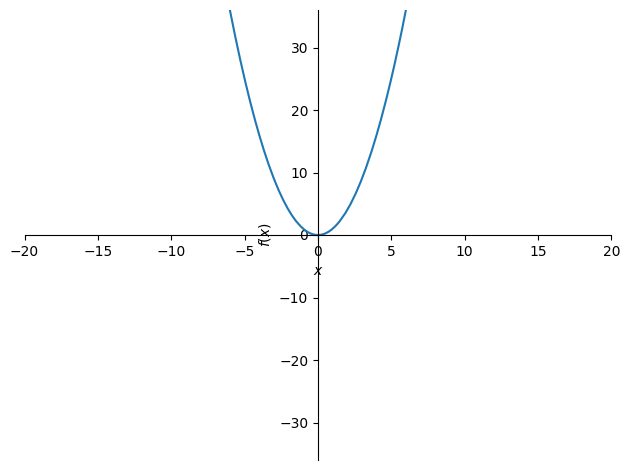

In [29]:
x = symbols('x')
p1 = plot(x*x, show=False,  xlim=[-20,20], ylim=[-36, 36])

p1.show()

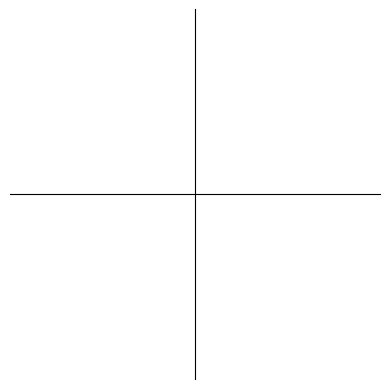

In [30]:
# Create a figure and an axes
fig = plt.figure()
ax = fig.add_subplot()
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Move the remaining spines to the zero of the other axis
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# Set the limits for the axes
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.set_aspect('equal')

# Create the function



# Show the plot
plt.show()